# **Loan Approval Prediction Using Machine Learning Techniques**

The aim of this project is to develop and implement efficient machine learning models for predicting loan approval based on historical applicant data, identifying patterns associated with approved and rejected loans. Our focus will be on evaluating and comparing the performance of these models during both the training and testing phases, using metrics such as accuracy, precision, recall, and F1-score. By analyzing these performance indicators, we aim to determine the most effective model for accurately predicting loan approvals in real-world scenarios.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset=pd.read_csv('Loan-Approval-Prediction.csv')

In [3]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

# **Preprocessing the data.**

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
cat_imputer=SimpleImputer(strategy='most_frequent')
num_imputer=SimpleImputer(strategy='mean')

In [8]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [9]:
dataset[categorical_cols]=cat_imputer.fit_transform(dataset[categorical_cols])
dataset[numerical_cols]=num_imputer.fit_transform(dataset[numerical_cols])

In [10]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

Text(0.5, 0.98, 'Loan Status Distribution')

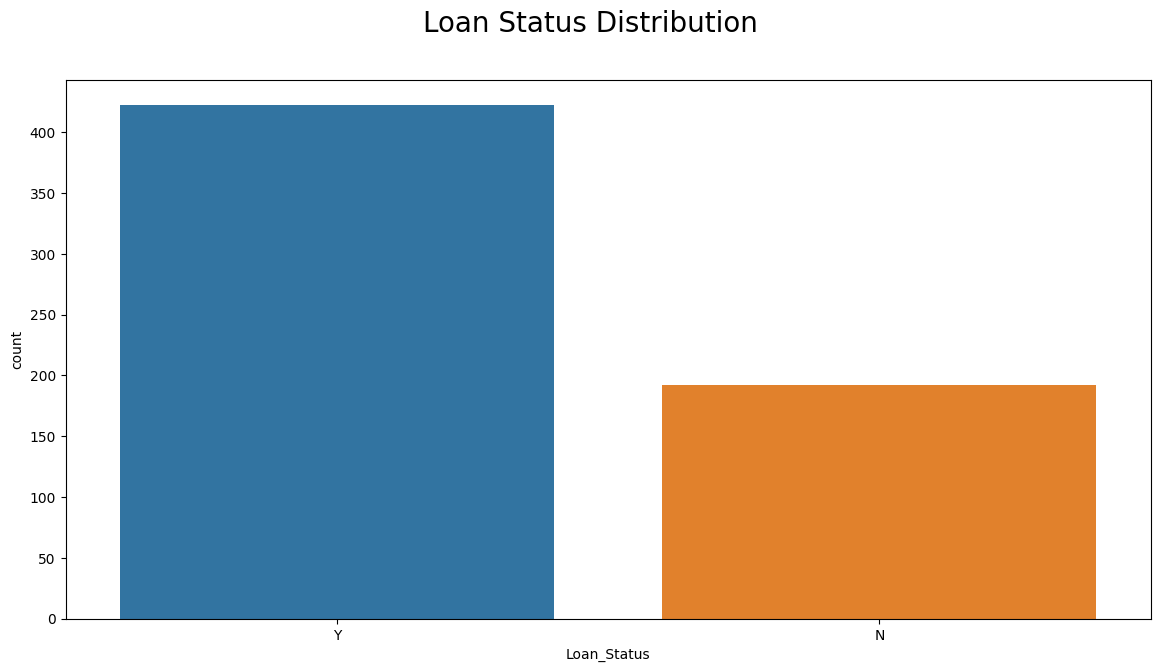

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x='Loan_Status', data=dataset)
plt.suptitle('Loan Status Distribution',fontsize=20)

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

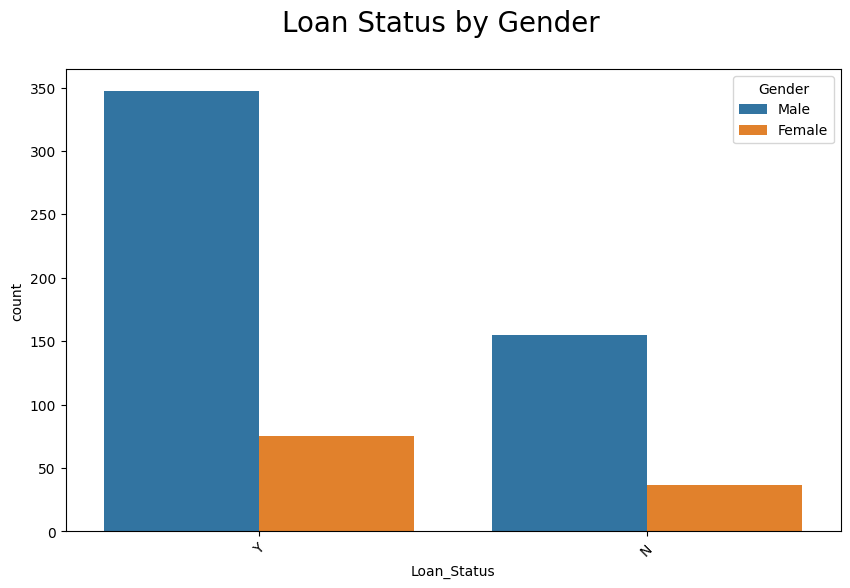

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Loan_Status', hue='Gender')
plt.suptitle("Loan Status by Gender",fontsize=20)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

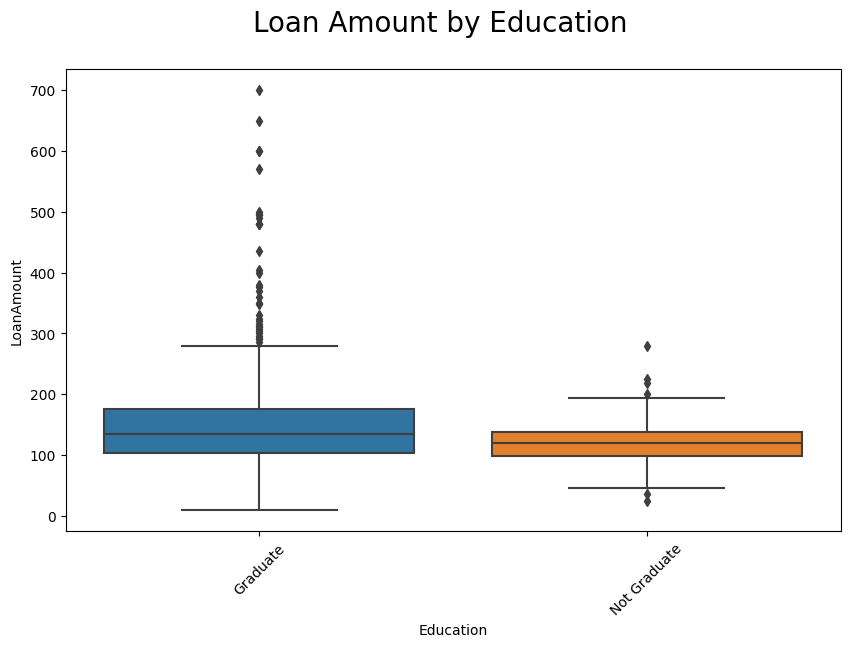

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Education', y='LoanAmount')
plt.suptitle("Loan Amount by Education",fontsize=20)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural'), Text(2, 0, 'Semiurban')])

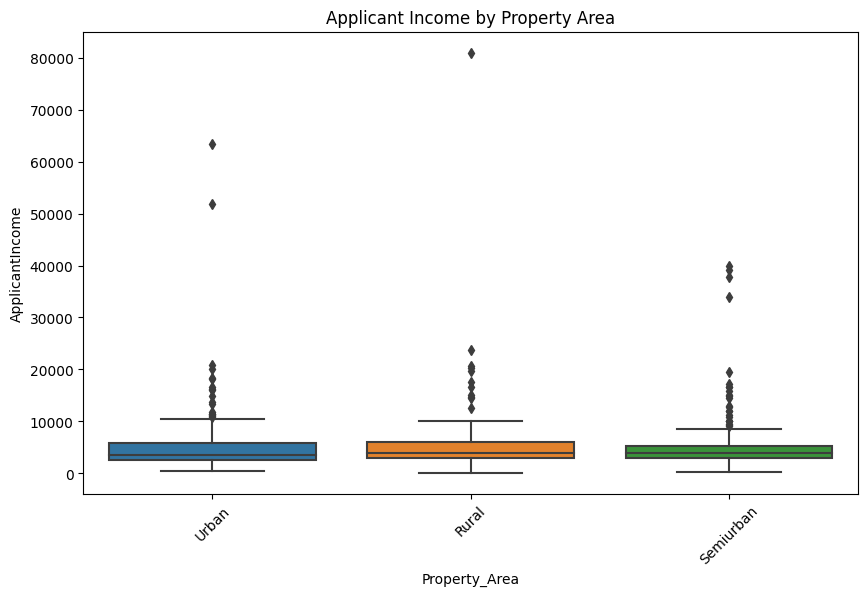

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Property_Area', y='ApplicantIncome')
plt.title("Applicant Income by Property Area")
plt.xticks(rotation=45)

Text(0.5, 0.98, 'Loan Amount by Loan Status')

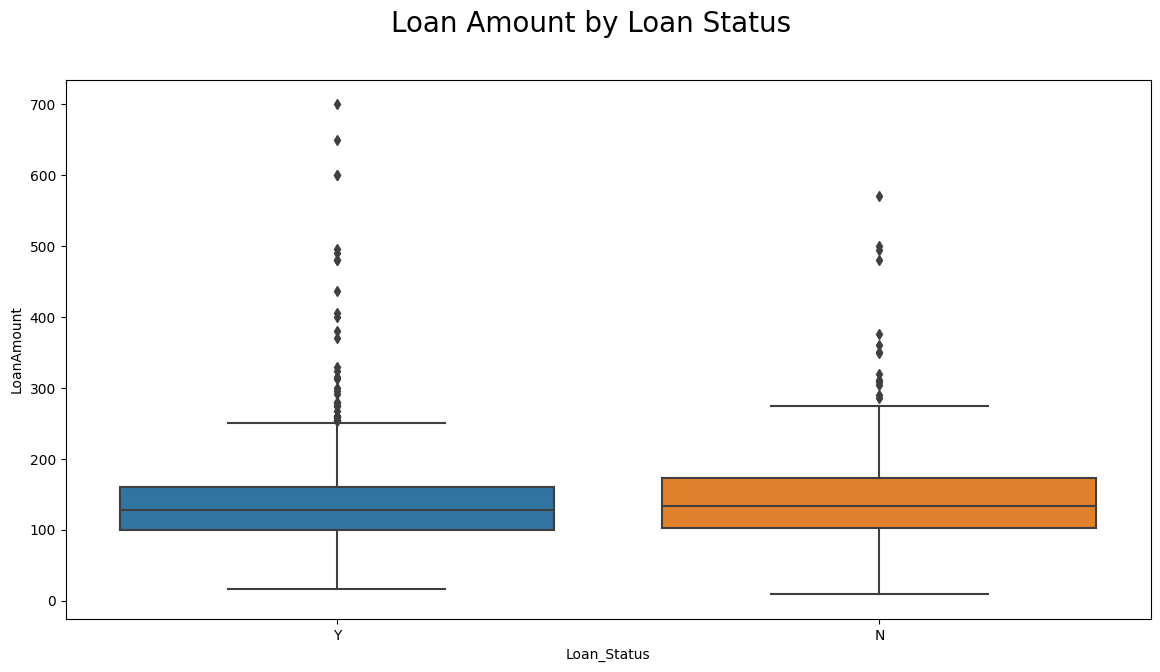

In [15]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=dataset)
plt.suptitle('Loan Amount by Loan Status',fontsize=20)

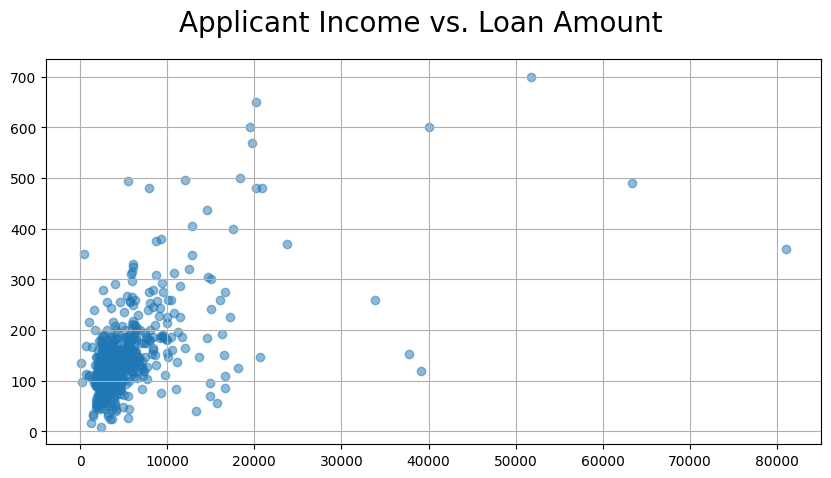

In [16]:
# Scatter plot for Applicant Income vs. Loan Amount
plt.figure(figsize=(10, 5))
plt.scatter(dataset['ApplicantIncome'], dataset['LoanAmount'], alpha=0.5)
plt.suptitle('Applicant Income vs. Loan Amount',fontsize=20)
plt.grid()

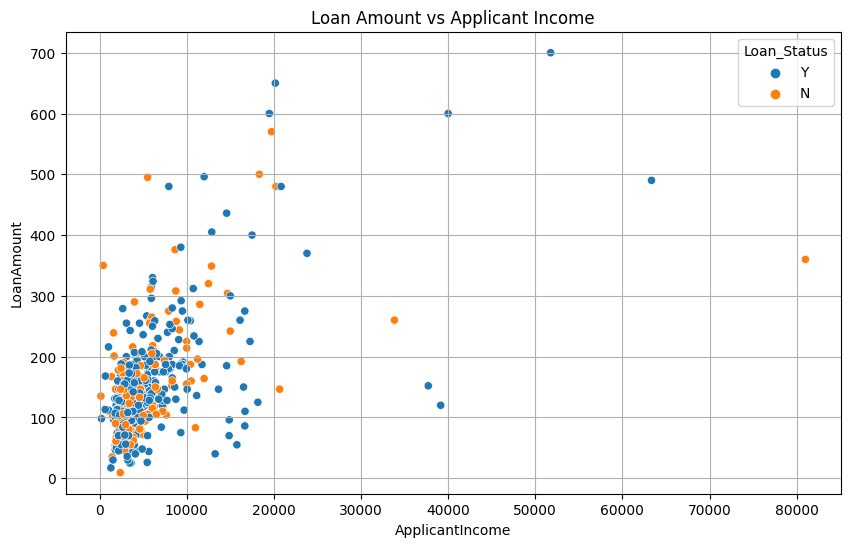

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Loan Amount vs Applicant Income")
plt.grid()

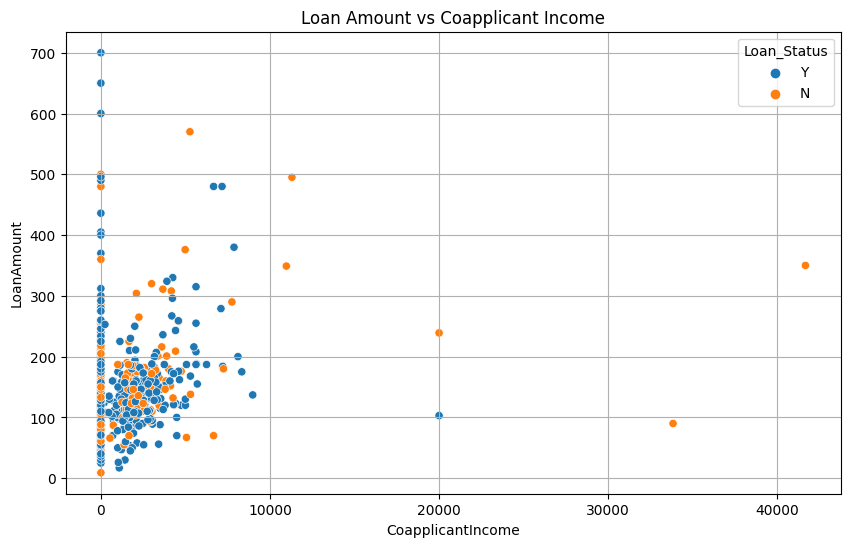

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Loan Amount vs Coapplicant Income")
plt.grid()

(array([0, 1, 2]),
 [Text(0, 0, '0.0'), Text(1, 0, '0.8421985815602837'), Text(2, 0, '1.0')])

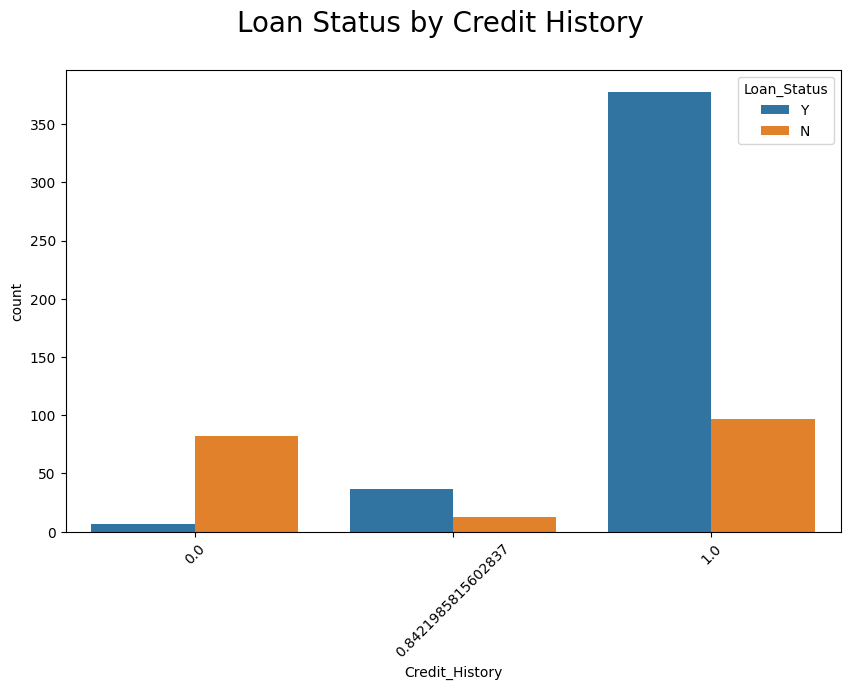

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Credit_History', hue='Loan_Status')
plt.suptitle("Loan Status by Credit History",fontsize=20)
plt.xticks(rotation=45)

# OUTLIERS

Text(0.5, 0.98, 'Box Plot of Applicant Income')

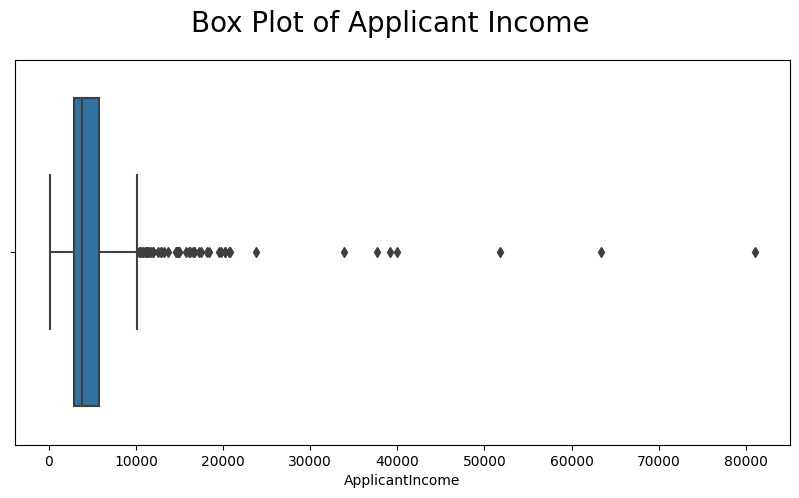

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['ApplicantIncome'])
plt.suptitle('Box Plot of Applicant Income',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Coapplicant Income')

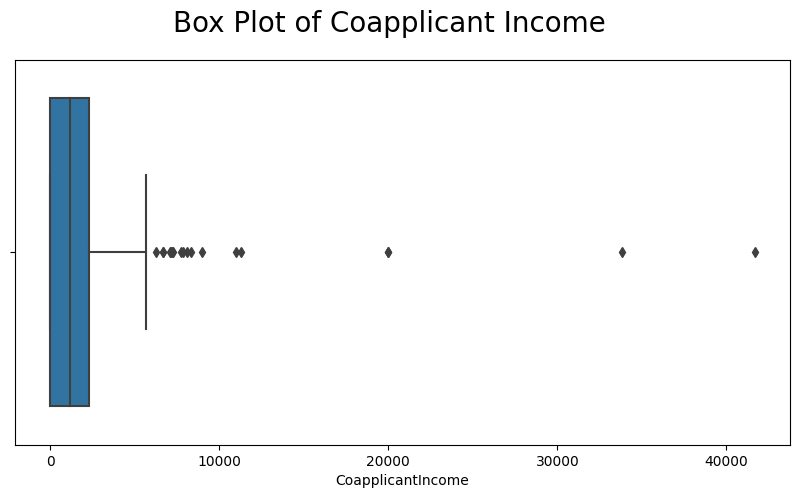

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['CoapplicantIncome'])
plt.suptitle('Box Plot of Coapplicant Income',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Loan Amount')

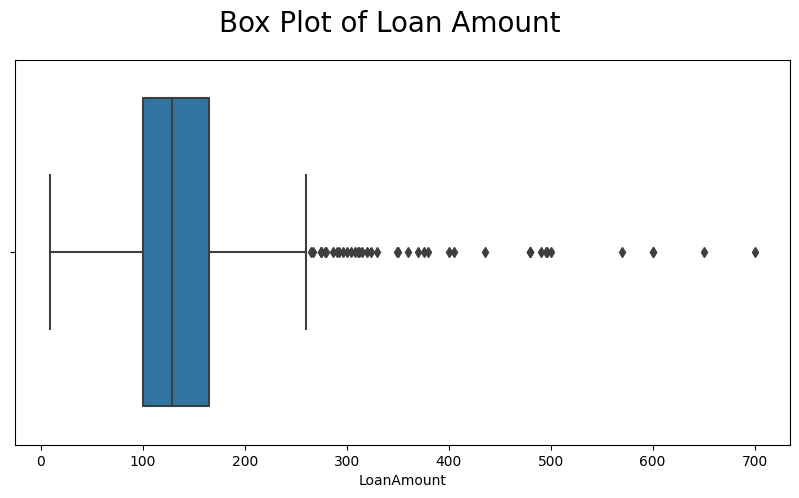

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['LoanAmount'])
plt.suptitle('Box Plot of Loan Amount',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Loan Amount Term')

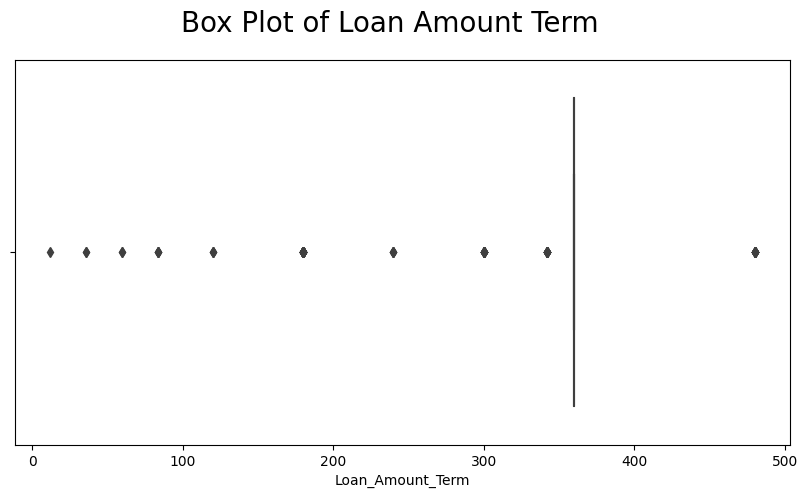

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Loan_Amount_Term'])
plt.suptitle('Box Plot of Loan Amount Term',fontsize=20)

In [24]:
def handle_outliers_zscore(dataset, column, z_threshold=3):
    # Calculate the Z-scores
    z_scores = np.abs(stats.zscore(dataset[column]))
    
    # Determine the replacement values for outliers
    mean_val = dataset[column].mean()
    std_val = dataset[column].std()
    
    # Create a mask for outliers
    outliers_mask = z_scores > z_threshold
    
    # Calculate the cap values
    cap_high = mean_val + z_threshold * std_val
    cap_low = mean_val - z_threshold * std_val
    
    # Replace outliers with cap values
    # Here, we ensure we're only operating on the existing DataFrame indices
    dataset[column] = np.where(outliers_mask, 
                            np.where(dataset[column] > mean_val, cap_high, cap_low), 
                            dataset[column])
    
    return dataset

In [25]:
# Apply Z-score method
dataset = handle_outliers_zscore(dataset, 'ApplicantIncome')
dataset = handle_outliers_zscore(dataset, 'CoapplicantIncome')
dataset = handle_outliers_zscore(dataset, 'LoanAmount')
dataset = handle_outliers_zscore(dataset,'Loan_Amount_Term')

In [26]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


Text(0.5, 0.98, 'Box Plot of Applicant Income')

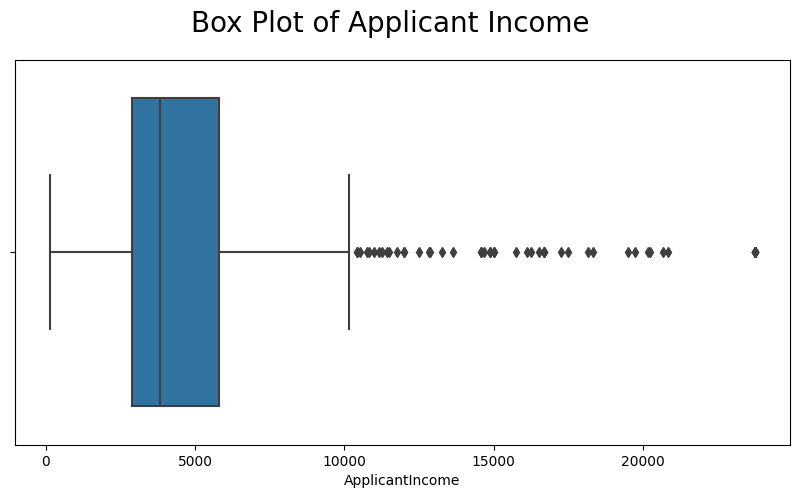

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['ApplicantIncome'])
plt.suptitle('Box Plot of Applicant Income',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Coapplicant Income')

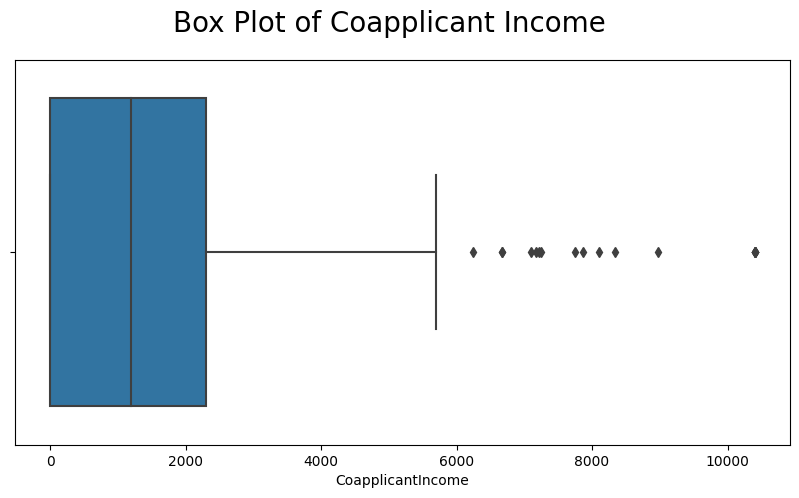

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['CoapplicantIncome'])
plt.suptitle('Box Plot of Coapplicant Income',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Loan Amount')

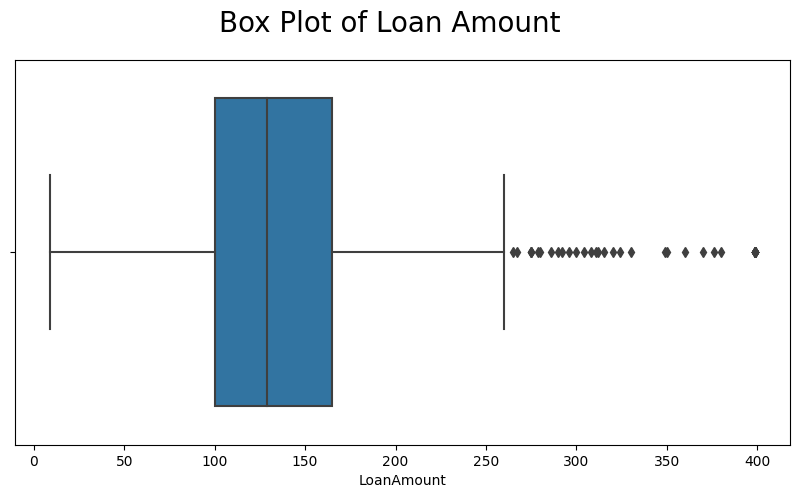

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['LoanAmount'])
plt.suptitle('Box Plot of Loan Amount',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Loan Amount Term')

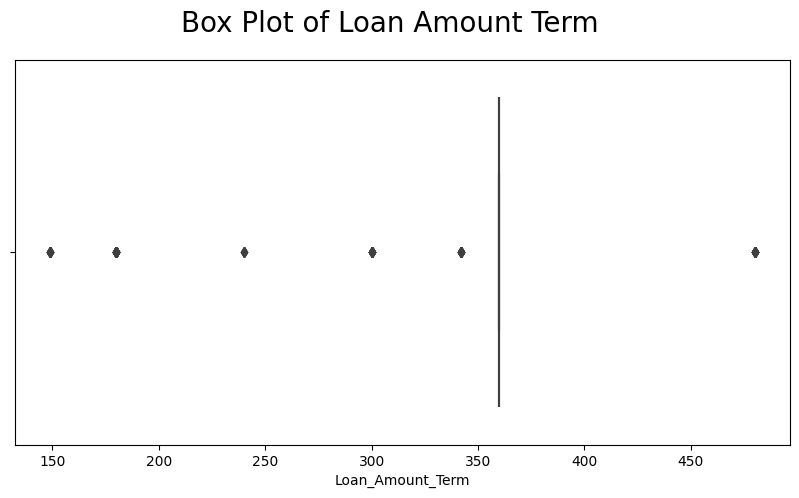

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Loan_Amount_Term'])
plt.suptitle('Box Plot of Loan Amount Term',fontsize=20)

In [31]:
#importing the necassery libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [32]:
#creating an object for the preprocessing
label=LabelEncoder()
std=StandardScaler()

In [33]:
dataset['Loan_ID']=label.fit_transform(dataset['Loan_ID'])
dataset['Gender']=label.fit_transform(dataset['Gender'])
dataset['Married']=label.fit_transform(dataset['Married'])
dataset['Dependents']=label.fit_transform(dataset['Dependents'])
dataset['Education']=label.fit_transform(dataset['Education'])
dataset['Self_Employed']=label.fit_transform(dataset['Self_Employed'])
dataset['Property_Area']=label.fit_transform(dataset['Property_Area'])
dataset['Loan_Status']=label.fit_transform(dataset['Loan_Status'])

In [34]:
dataset['ApplicantIncome']=std.fit_transform(dataset['ApplicantIncome'].values.reshape(-1,1))
dataset['CoapplicantIncome']=std.fit_transform(dataset['CoapplicantIncome'].values.reshape(-1,1))
dataset['LoanAmount']=std.fit_transform(dataset['LoanAmount'].values.reshape(-1,1))
dataset['Loan_Amount_Term']=std.fit_transform(dataset['Loan_Amount_Term'].values.reshape(-1,1))

In [35]:
#Splitting the dataset to X and Y.
x=dataset[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y=dataset[['Loan_Status']]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

# **Importing the machine learning models and fitting the dataset into the model**

Since, the target variable is a continous variable we are using the regression model to predict the outcome of the training and the testing dataset we have splitted above.

In [38]:
#Let's import the first model
from sklearn.linear_model import LogisticRegression

In [39]:
model_1=LogisticRegression()

In [40]:
model_1.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model_1.score(x_train,y_train)

0.8260869565217391

In [42]:
y_pred_1=model_1.predict(x_test)

In [43]:
#Let us import the metrics to predict the model outcome.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error

In [44]:
print('F1 score: ', f1_score(y_test, y_pred_1))
print('Recall_score: ', recall_score(y_test, y_pred_1))
print('Precision score: ', precision_score(y_test, y_pred_1))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_1))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_1))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_1))

F1 score:  0.8586666666666667
Recall_score:  0.9640718562874252
Precision score:  0.7740384615384616
Accuracy Score:  0.7845528455284553
Mean Squared Error:  0.21544715447154472
Mean Absolute Error:  0.21544715447154472


Text(0.5, 0.98, 'Logistic Regression metrics value using confusion matrix')

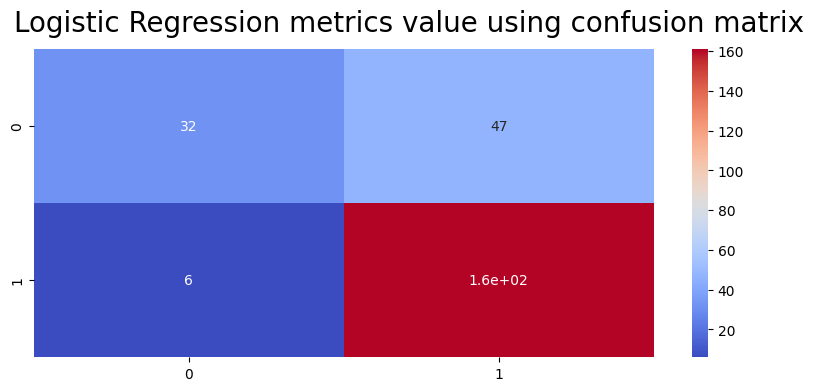

In [45]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot = True, cmap = 'coolwarm')
plt.suptitle('Logistic Regression metrics value using confusion matrix',fontsize=20)

In [46]:
#Let's import the second model
from sklearn.tree import DecisionTreeClassifier

In [47]:
model_2=DecisionTreeClassifier()

In [48]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
model_2.score(x_train,y_train)

1.0

In [50]:
y_pred_2=model_2.predict(x_test)

In [51]:
print('F1 score: ', f1_score(y_test, y_pred_2))
print('Recall_score: ', recall_score(y_test, y_pred_2))
print('Precision score: ', precision_score(y_test, y_pred_2))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_2))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_2))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_2))

F1 score:  0.7706422018348622
Recall_score:  0.7544910179640718
Precision score:  0.7875
Accuracy Score:  0.6951219512195121
Mean Squared Error:  0.3048780487804878
Mean Absolute Error:  0.3048780487804878


Text(0.5, 0.98, 'Decision Tree metrics value using confusion matrix')

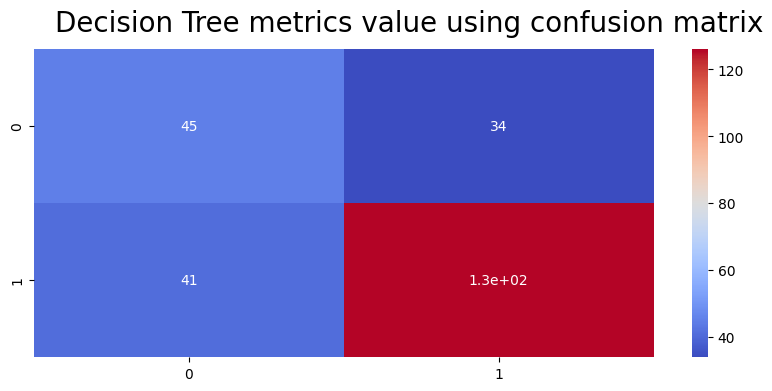

In [52]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot = True, cmap = 'coolwarm')
plt.suptitle('Decision Tree metrics value using confusion matrix',fontsize=20)

In [53]:
#Let's us import  the third model.
from sklearn.ensemble import RandomForestClassifier

In [54]:
model_3=RandomForestClassifier()

In [55]:
model_3.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11028\3858944095.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(x_train,y_train)


RandomForestClassifier()

In [56]:
model_3.score(x_train,y_train)

1.0

In [57]:
y_pred_3=model_3.predict(x_test)

In [58]:
print('F1 score: ', f1_score(y_test, y_pred_3))
print('Recall_score: ', recall_score(y_test, y_pred_3))
print('Precision score: ', precision_score(y_test, y_pred_3))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_3))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_3))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_3))

F1 score:  0.8423913043478262
Recall_score:  0.9281437125748503
Precision score:  0.7711442786069652
Accuracy Score:  0.7642276422764228
Mean Squared Error:  0.23577235772357724
Mean Absolute Error:  0.23577235772357724


Text(0.5, 0.98, 'Random Forest metrics value using confusion matrix')

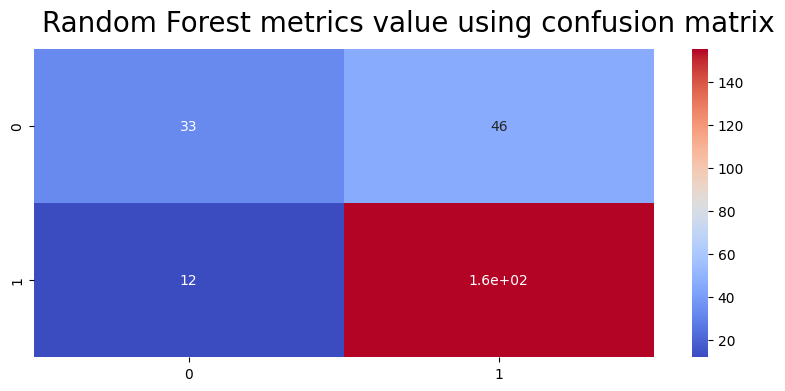

In [59]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_3), annot = True, cmap = 'coolwarm')
plt.suptitle('Random Forest metrics value using confusion matrix',fontsize=20)

In [60]:
#Let's us import the other model
from sklearn.neighbors import KNeighborsClassifier

In [61]:
model_4=KNeighborsClassifier()

In [62]:
model_4.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [63]:
model_4.score(x_train,y_train)

0.7445652173913043

In [64]:
y_pred_4=model_4.predict(x_test)

In [65]:
print('F1 score: ', f1_score(y_test, y_pred_4))
print('Recall_score: ', recall_score(y_test, y_pred_4))
print('Precision score: ', precision_score(y_test, y_pred_4))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_4))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_4))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_4))

F1 score:  0.7459459459459459
Recall_score:  0.8263473053892215
Precision score:  0.6798029556650246
Accuracy Score:  0.6178861788617886
Mean Squared Error:  0.3821138211382114
Mean Absolute Error:  0.3821138211382114


Text(0.5, 0.98, 'KNN metrics value using confusion matrix')

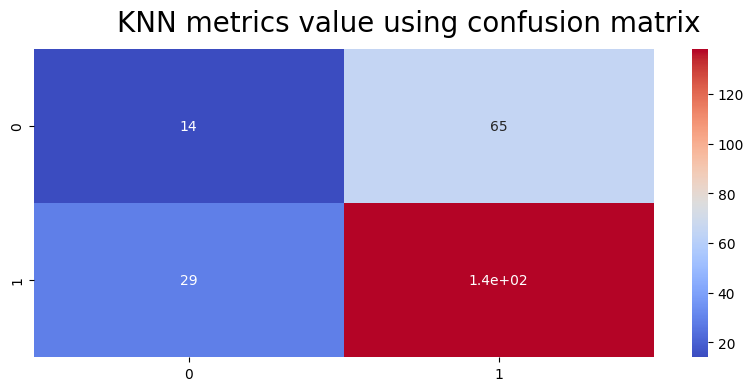

In [66]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_4), annot = True, cmap = 'coolwarm')
plt.suptitle('KNN metrics value using confusion matrix',fontsize=20)

In [67]:
from sklearn.svm import SVC

In [68]:
model_5=SVC()

In [69]:
model_5.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [70]:
model_5.score(x_train,y_train)

0.6929347826086957

In [71]:
y_pred_5=model_5.predict(x_test)

In [72]:
print('F1 score: ', f1_score(y_test, y_pred_5))
print('Recall_score: ', recall_score(y_test, y_pred_5))
print('Precision score: ', precision_score(y_test, y_pred_5))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_5))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_5))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_5))

F1 score:  0.8087167070217918
Recall_score:  1.0
Precision score:  0.6788617886178862
Accuracy Score:  0.6788617886178862
Mean Squared Error:  0.32113821138211385
Mean Absolute Error:  0.32113821138211385


Text(0.5, 0.98, 'SVM metrics value using confusion matrix')

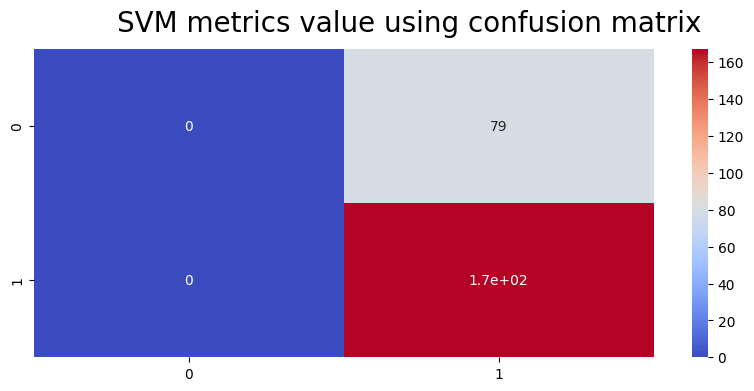

In [73]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_5), annot = True, cmap = 'coolwarm')
plt.suptitle('SVM metrics value using confusion matrix',fontsize=20)

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
model_6=GaussianNB()

In [76]:
model_6.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [77]:
model_6.score(x_train,y_train)

0.8288043478260869

In [78]:
y_pred_6=model_6.predict(x_test)

In [79]:
print('F1 score: ', f1_score(y_test, y_pred_6))
print('Recall_score: ', recall_score(y_test, y_pred_6))
print('Precision score: ', precision_score(y_test, y_pred_6))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_6))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_6))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_6))

F1 score:  0.8617021276595744
Recall_score:  0.9700598802395209
Precision score:  0.7751196172248804
Accuracy Score:  0.7886178861788617
Mean Squared Error:  0.21138211382113822
Mean Absolute Error:  0.21138211382113822


Text(0.5, 0.98, 'Gaussian NB metrics value using confusion matrix')

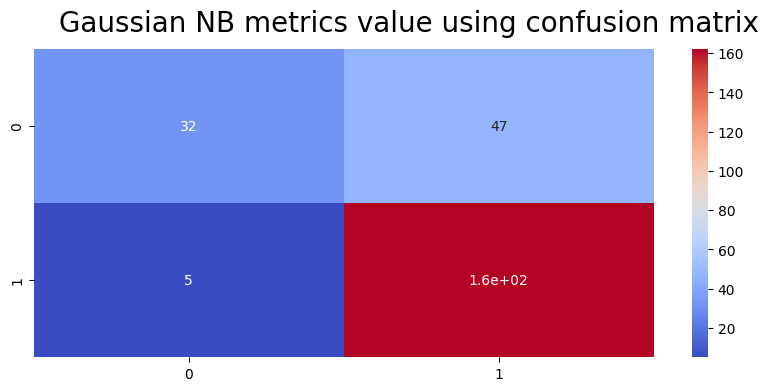

In [80]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_6), annot = True, cmap = 'coolwarm')
plt.suptitle('Gaussian NB metrics value using confusion matrix',fontsize=20)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
model_7=GradientBoostingClassifier()

In [83]:
model_7.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [84]:
model_7.score(x_train,y_train)

0.9429347826086957

In [85]:
y_pred_7=model_7.predict(x_test)

In [86]:
print('F1 score: ', f1_score(y_test, y_pred_7))
print('Recall_score: ', recall_score(y_test, y_pred_7))
print('Precision score: ', precision_score(y_test, y_pred_7))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_7))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_7))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_7))

F1 score:  0.8383561643835616
Recall_score:  0.9161676646706587
Precision score:  0.7727272727272727
Accuracy Score:  0.7601626016260162
Mean Squared Error:  0.23983739837398374
Mean Absolute Error:  0.23983739837398374


Text(0.5, 0.98, 'Gradient Boost metrics value using confusion matrix')

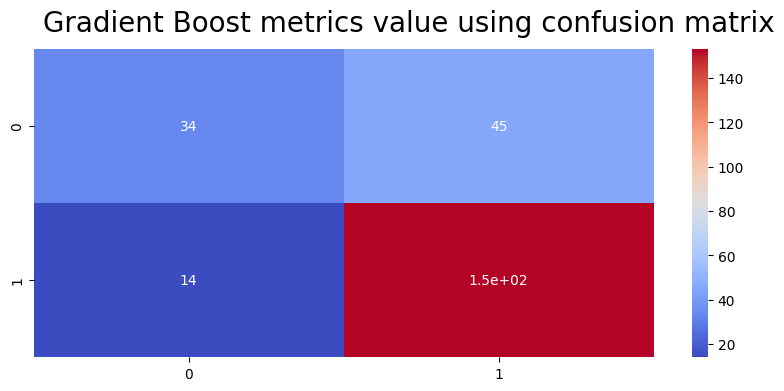

In [87]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_7), annot = True, cmap = 'coolwarm')
plt.suptitle('Gradient Boost metrics value using confusion matrix',fontsize=20)

In [88]:
from sklearn.neural_network import MLPClassifier

In [89]:
model_8=MLPClassifier()

In [90]:
model_8.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [91]:
model_8.score(x_train,y_train)

0.8152173913043478

In [92]:
y_pred_8=model_8.predict(x_test)

In [93]:
print('F1 score: ', f1_score(y_test, y_pred_8))
print('Recall_score: ', recall_score(y_test, y_pred_8))
print('Precision score: ', precision_score(y_test, y_pred_8))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_8))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_8))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_8))

F1 score:  0.8526315789473684
Recall_score:  0.9700598802395209
Precision score:  0.7605633802816901
Accuracy Score:  0.7723577235772358
Mean Squared Error:  0.22764227642276422
Mean Absolute Error:  0.22764227642276422


Text(0.5, 0.98, 'MLP metrics value using confusion matrix')

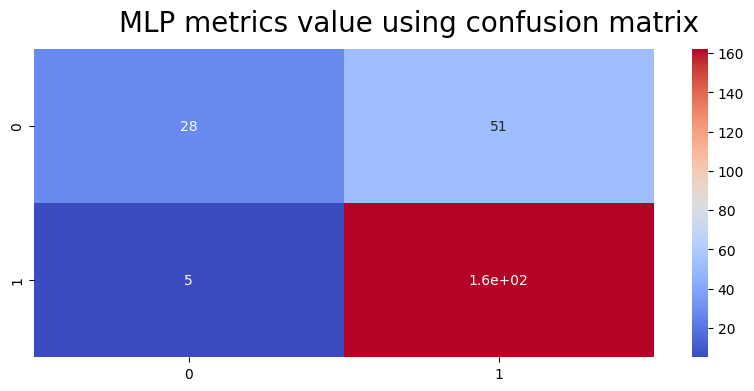

In [94]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_8), annot = True, cmap = 'coolwarm')
plt.suptitle('MLP metrics value using confusion matrix',fontsize=20)

In [95]:
from xgboost import XGBClassifier

In [96]:
model_9 = XGBClassifier()

In [97]:
model_9.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [98]:
y_pred_9=model_9.predict(x_test)

In [99]:
print('F1 score: ', f1_score(y_test, y_pred_9))
print('Recall_score: ', recall_score(y_test, y_pred_9))
print('Precision score: ', precision_score(y_test, y_pred_9))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_9))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_9))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_9))

F1 score:  0.8045977011494253
Recall_score:  0.8383233532934131
Precision score:  0.7734806629834254
Accuracy Score:  0.7235772357723578
Mean Squared Error:  0.2764227642276423
Mean Absolute Error:  0.2764227642276423


# **Training Performance Of Each Model using Numeric and Visualization**

In [100]:
#Let's enter the model name
model_name=['Logistic_regression','Decision_tree_classifier','Random_forest_classifier','KNN','SVC','Gaussian','Gradient_boost','MLP','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train),model_8.score(x_train,y_train),model_9.score(x_train,y_train)]

In [101]:
print('The Training score of Logistic Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of Random Forest is:',model_3.score(x_train,y_train))
print('The Training score of KNN is:',model_4.score(x_train,y_train))
print('The Training score of SVM is:',model_5.score(x_train,y_train))
print('The Training score of Gaussian NB is:',model_6.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_7.score(x_train,y_train))
print('The Training score of MLP is:',model_8.score(x_train,y_train))
print('The Training score of XGBoost is:',model_9.score(x_train,y_train))

The Training score of Logistic Regression is: 0.8260869565217391
The Training score of Decision Tree is: 1.0
The Training score of Random Forest is: 1.0
The Training score of KNN is: 0.7445652173913043
The Training score of SVM is: 0.6929347826086957
The Training score of Gaussian NB is: 0.8288043478260869
The Training score of GradientBoost is: 0.9429347826086957
The Training score of MLP is: 0.8152173913043478
The Training score of XGBoost is: 1.0


Text(0.5, 0.98, 'Training Score Of Each Model')

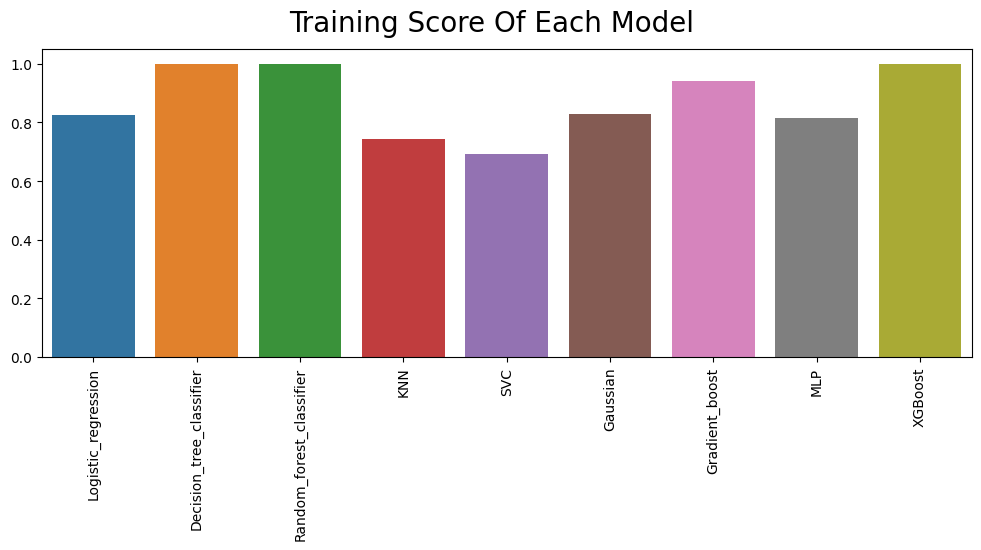

In [102]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of Each Model**

In the testing performance evaluation, we will utilize the accuracy_score metric for each model to determine the best-performing classifier.

In [103]:
#Let us create a table for the testing data
model_test_performance=[accuracy_score(y_test, y_pred_1),accuracy_score(y_test, y_pred_2),accuracy_score(y_test, y_pred_3),accuracy_score(y_test, y_pred_4),accuracy_score(y_test, y_pred_5),accuracy_score(y_test, y_pred_6),accuracy_score(y_test, y_pred_7),accuracy_score(y_test, y_pred_8),accuracy_score(y_test,y_pred_9)]

In [104]:
print('The Testing score of Logistic Regression is:',accuracy_score(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',accuracy_score(y_test,y_pred_2))
print('The Testing score of Random Forest is:',accuracy_score(y_test,y_pred_3))
print('The Testing score of KNN is:',accuracy_score(y_test,y_pred_4))
print('The Testing score of SVM is:',accuracy_score(y_test,y_pred_5))
print('The Testing score of Gaussian NB is:',accuracy_score(y_test,y_pred_6))
print('The Testing score of GradientBoost is:',accuracy_score(y_test,y_pred_7))
print('The Testing score of MLP is:',accuracy_score(y_test,y_pred_8))
print('The Testing score of XGBoost is:',accuracy_score(y_test,y_pred_9))

The Testing score of Logistic Regression is: 0.7845528455284553
The Testing score of Decision Tree is: 0.6951219512195121
The Testing score of Random Forest is: 0.7642276422764228
The Testing score of KNN is: 0.6178861788617886
The Testing score of SVM is: 0.6788617886178862
The Testing score of Gaussian NB is: 0.7886178861788617
The Testing score of GradientBoost is: 0.7601626016260162
The Testing score of MLP is: 0.7723577235772358
The Testing score of XGBoost is: 0.7235772357723578


Text(0.5, 0.98, 'Testing Score Of Each Model')

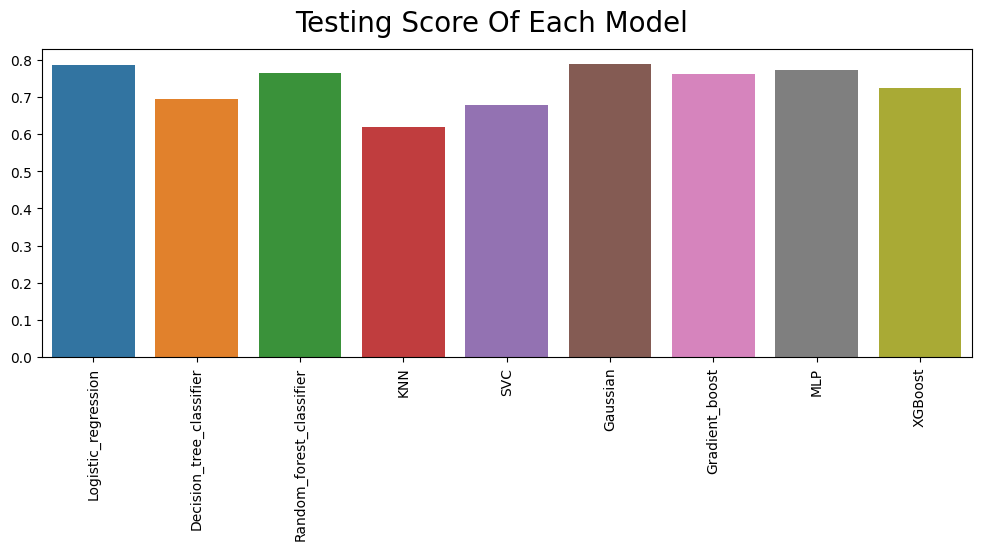

In [105]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)